# Numpy, Matplotlib and Sklearn Tutorial

We often use numpy to handle high dimensional arrays.

Let's try the basic operation of numpy:

In [1]:
import numpy as np

a = np.array([[1,2,3], [2,3,4]])
print(a.ndim, a.shape, a.size, a.dtype, type(a))

b = np.zeros((3,4))
c = np.ones((3,4))
d = np.random.randn(2,3)
e = np.array([[1,2], [2,3], [3,4]])
f = b*2 - c*3
g = 2*c*f
h = np.dot(a,e)
i = d.mean()
j = d.max(axis=1)
k = a[-1][:2]

# You can print a to k for details

2 (2, 3) 6 int32 <class 'numpy.ndarray'>


matplotlib.pyplot provides very useful apis for drawing graphs.

Let's try the basic operation of matplotlib.pyplot:

In [2]:
import matplotlib.pyplot as plt

x = np.arange(2, 10, 0.2)

plt.plot(x, x**1.5*.5, 'r-', x, np.log(x)*5, 'g--', x, x, 'b.')
plt.show()

<Figure size 640x480 with 1 Axes>

If you want to print them in different graphs, try this:

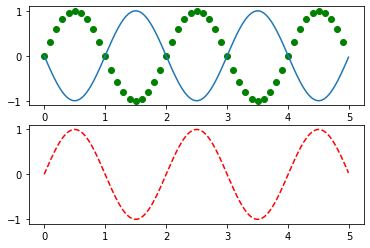

In [3]:
def f(x):
    return np.sin(np.pi*x)

x1 = np.arange(0, 5, 0.1)
x2 = np.arange(0, 5, 0.01)

plt.subplot(211)
plt.plot(x1, f(x1), 'go', x2, f(x2-1))

plt.subplot(212)
plt.plot(x2, f(x2), 'r--')
plt.show()

How about printing images?

Let's try to print a image whose pixels gradually change:

Different pixel values represent different gray levels.

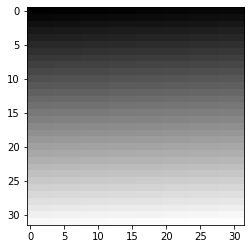

In [4]:
img = np.arange(0, 1, 1/32/32) # define an 1D array with 32x32 elements gradually increasing
img = img.reshape(32, 32) # reshape it into 32x32 array, the array represents a 32x32 image,
                          # each element represents the corresponding pixel of the image
plt.imshow(img, cmap='gray')
plt.show()

Based on numpy, Scikit-learn (sklearn) provides a lot of tools for machine learning.It is a very powerful machine learning library.

Then, let's use it for mnist classification:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


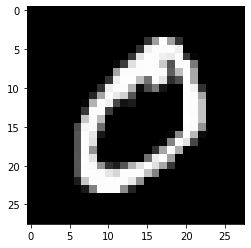

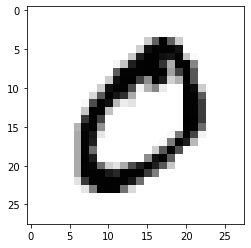

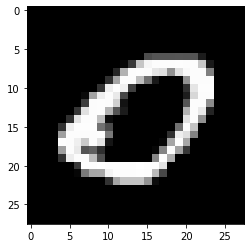

In [3]:
from sklearn.datasets import fetch_mldata

# download and read mnist
mnist = fetch_mldata('MNIST original', data_home='./')

# 'mnist.data' is 70k x 784 array, each row represents the pixels from a 28x28=784 image
# 'mnist.target' is 70k x 1 array, each row represents the target class of the corresponding image
images = mnist.data
targets = mnist.target

# make the value of pixels from [0, 255] to [0, 1] for further process
X = mnist.data / 255.
Y = mnist.target

# print the first image of the dataset
img1 = X[0].reshape(28, 28)
plt.imshow(img1, cmap='gray')
plt.show()

# print the images after simple transformation
img2 = 1 - img1
plt.imshow(img2, cmap='gray')
plt.show()

img3 = img1.transpose()
plt.imshow(img3, cmap='gray')
plt.show()

In [5]:
# split data to train and test (for faster calculation, just use 1/10 data)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X[::10], Y[::10], test_size=1000)

#### Q1:
Please use the logistic regression(default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

C: 0.1  Traning_accuracy =  0.9275  Test_accuracy =  0.902
C: 0.2  Traning_accuracy =  0.9353333333333333  Test_accuracy =  0.901
C: 0.30000000000000004  Traning_accuracy =  0.9395  Test_accuracy =  0.902
C: 0.4  Traning_accuracy =  0.9408333333333333  Test_accuracy =  0.901
C: 0.5  Traning_accuracy =  0.9436666666666667  Test_accuracy =  0.903
C: 0.6000000000000001  Traning_accuracy =  0.9461666666666667  Test_accuracy =  0.901
C: 0.7000000000000001  Traning_accuracy =  0.9481666666666667  Test_accuracy =  0.9
C: 0.8  Traning_accuracy =  0.9486666666666667  Test_accuracy =  0.899
C: 0.9  Traning_accuracy =  0.949  Test_accuracy =  0.9
C: 1.0  Traning_accuracy =  0.9496666666666667  Test_accuracy =  0.9
C: 1.1  Traning_accuracy =  0.9503333333333334  Test_accuracy =  0.902
C: 1.2000000000000002  Traning_accuracy =  0.9513333333333334  Test_accuracy =  0.899
C: 1.3  Traning_accuracy =  0.9515  Test_accuracy =  0.899
C: 1.4000000000000001  Traning_accuracy =  0.9518333333333333  Test_acc

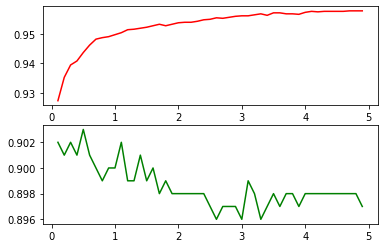

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
result = np.zeros((3,1))
for i in range(1,50,1):
    classifier = LogisticRegression(penalty = 'l2',dual = False,tol = 0.01,
                          C = 0.1 * i,fit_intercept = True,class_weight = None,
                          random_state = None,solver = 'sag',
                          max_iter = 100000,multi_class = 'ovr',n_jobs = -1)
    classifier.fit(X_train,Y_train)
    y_predict = classifier.predict(X_train)
    Y_predict = classifier.predict(X_test)
    train_accuracy = 1 - len(np.nonzero(Y_train-y_predict)[0])/len(Y_train)
    test_accuracy = 1 - len(np.nonzero(Y_test-Y_predict)[0])/len(Y_test)
    print('C:',0.1*i,' Traning_accuracy = ',train_accuracy,' Test_accuracy = ',test_accuracy)
    temp = np.array([[0.1 * i],[train_accuracy],[test_accuracy]])
    result = np.c_[result,temp]
result = np.delete(result, 0, axis=1)
plt.subplot(211)
plt.plot(result[0,:],result[1,:],'r')
plt.subplot(212)
plt.plot(result[0,:],result[2,:],'g')
plt.show()

In [25]:
# TODO:use logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

classifierLog = LogisticRegression(penalty = 'l2',dual = False,tol = 0.01,
                          C = 0.5,fit_intercept = True,class_weight = None,
                          random_state = None,solver = 'sag',
                          max_iter = 100000,multi_class = 'ovr',n_jobs = -1)
classifierLog.fit(X_train,Y_train)
y_predict = classifier.predict(X_train)
Y_predict = classifier.predict(X_test)
train_accuracy = 1 - len(np.nonzero(Y_train-y_predict)[0])/len(Y_train)
test_accuracy = 1 - len(np.nonzero(Y_test-Y_predict)[0])/len(Y_test)
print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 94.43%
Testing accuracy: 90.30%


#### Q2:
Please use the naive bayes(Bernoulli, default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

In [8]:
# TODO:use naive bayes
from sklearn.naive_bayes import BernoulliNB
classifierBer = BernoulliNB()
classifierBer.fit(X_train,Y_train)
y_predict = classifierBer.predict(X_train)
Y_predict = classifierBer.predict(X_test)
test_accuracy = classifierBer.score(X_test,Y_test)
train_accuracy = classifierBer.score(X_train,Y_train)
print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 84.08%
Testing accuracy: 83.00%


#### Q3:
Please use the support vector machine(default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

In [12]:
# TODO:use support vector machine
from sklearn.svm import LinearSVC
classifierSVM = LinearSVC(penalty='l2', loss='squared_hinge', 
                       dual=True, tol=0.0001, C=1.0, 
                       multi_class='ovr', fit_intercept=True, 
                       intercept_scaling=1, class_weight=None, 
                       verbose=0, random_state=None, max_iter=100000)
classifierSVM.fit(X_train,Y_train)
y_predict = classifierSVM.predict(X_train)
Y_predict = classifierSVM.predict(X_test)
test_accuracy = classifierSVM.score(X_test,Y_test)
train_accuracy = classifierSVM.score(X_train,Y_train)
print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 98.30%
Testing accuracy: 87.40%


#### Q4:
Please adjust the parameters of SVM to increase the testing accuracy, and print the training accuracy and test accuracy.

C: 0.1  Traning_accuracy =  0.959  Test_accuracy =  0.901
C: 0.2  Traning_accuracy =  0.9663333333333334  Test_accuracy =  0.897
C: 0.30000000000000004  Traning_accuracy =  0.971  Test_accuracy =  0.894
C: 0.4  Traning_accuracy =  0.9723333333333334  Test_accuracy =  0.892
C: 0.5  Traning_accuracy =  0.9746666666666667  Test_accuracy =  0.893
C: 0.6000000000000001  Traning_accuracy =  0.9763333333333334  Test_accuracy =  0.895
C: 0.7000000000000001  Traning_accuracy =  0.9773333333333334  Test_accuracy =  0.893
C: 0.8  Traning_accuracy =  0.9785  Test_accuracy =  0.895
C: 0.9  Traning_accuracy =  0.9793333333333333  Test_accuracy =  0.895
C: 1.0  Traning_accuracy =  0.9798333333333333  Test_accuracy =  0.894
C: 1.1  Traning_accuracy =  0.9808333333333333  Test_accuracy =  0.892
C: 1.2000000000000002  Traning_accuracy =  0.9818333333333333  Test_accuracy =  0.889
C: 1.3  Traning_accuracy =  0.9823333333333333  Test_accuracy =  0.89
C: 1.4000000000000001  Traning_accuracy =  0.983  Test_

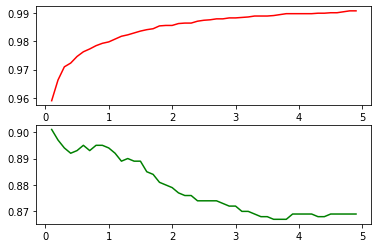

Best training accuracy: 99.08%


TypeError: only size-1 arrays can be converted to Python scalars

In [6]:
# TODO:use SVM with another group of parameters

from sklearn.svm import LinearSVC
result = np.zeros((3,1))
test_max = 0
test_max_index = 0
train_max = 0
train_max_index = 0
for i in range(1,50,1):
    classifierSVM = LinearSVC(penalty='l2', loss='squared_hinge', 
                           dual=True, tol=0.0001, C=0.1 * i, 
                           multi_class='ovr', fit_intercept=True, 
                           intercept_scaling=1, class_weight=None, 
                           verbose=0, random_state=None, max_iter=100000)
    classifierSVM.fit(X_train,Y_train)
    y_predict = classifierSVM.predict(X_train)
    Y_predict = classifierSVM.predict(X_test)
    test_accuracy = classifierSVM.score(X_test,Y_test)
    train_accuracy = classifierSVM.score(X_train,Y_train)
#   print('Training accuracy: %0.2f%%' % (train_accuracy*100))
#   print('Testing accuracy: %0.2f%%' % (test_accuracy*100))
    print('C:',0.1*i,' Traning_accuracy = ',train_accuracy,' Test_accuracy = ',test_accuracy)
    temp = np.array([[0.1 * i],[train_accuracy],[test_accuracy]])
    result = np.c_[result,temp]
    if test_accuracy > test_max:
        test_max = test_accuracy
        test_max_index = i
    if train_accuracy > train_max:
        train_max = train_accuracy
        train_max_index = c 
result = np.delete(result, 0, axis=1)
plt.subplot(211)
plt.plot(result[0,:],result[1,:],'r')
plt.subplot(212)
plt.plot(result[0,:],result[2,:],'g')
plt.show()
print('Best training accuracy: %0.2f%%' % (train_max*100))
print('Best C for train: %0.2f%%' % (train_max_index*100))
print('Best testing accuracy: %0.2f%%' % (test_max*100))
print('Best C for test: %0.2f%%' % (test_max_index*100))